In [1]:
import os 
import scipy.io 
import matplotlib.pyplot as plt 
import numpy as np
import sys 
sys.path.append("../")

import scienceplots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
from utils import relative_err
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text

from utils import load_cos3d_kernel_dataset, load_log3d_kernel_dataset, load_logcos3d_kernel_dataset

In [ ]:
def vis_ogapw_3D_dynamics(outnm=None):
    cm = 1/2.54
    f = plt.figure(figsize=(7,3.5))
    subfigs = f.subfigures(1,3, wspace=.2).flatten()
    ax1 = subfigs[0].subplots()
    ax2 = subfigs[1].subplots()
    ax3 = subfigs[2].subplots()
    # ax4 = subfigs[3].subplots()

    def load_data(task, nTrain=3000, nTest=1000, sigma='1e-01', param=2):
        fTrain, fTest, uTrain, uTest, X, Gref = load_logcos3d_kernel_dataset(
            '../data', nTrain, nTest, n=param, sigma=sigma)
                
        url2s = []
        Grl2s = []
        ns = np.array([8, 16, 32, 64, 128, 256])
        for n in ns:
            upredpath = f'../results_sub/logcos3D/ogapw-{n}-{nTrain}-512-17-{param}-{sigma}-relu/upred.npy'
            Gogapath = f'../results_sub/logcos3D/ogapw-{n}-{nTrain}-512-17-{param}-{sigma}-relu/Goga.npy'

            upred = np.load(upredpath, allow_pickle=True)
            Gpred = np.load(Gogapath, allow_pickle=True)
            # print(upred.shape)
            url2 = relative_err(upred, uTest[:102])
            Grl2 = relative_err(Gpred[:102*4913], Gref[:102].reshape(-1))

            url2s.append(url2)
            Grl2s.append(Grl2)
            print("n : {:} rl2 : {:.4e}".format(n, Grl2))
        
        return ns, np.array(url2s), np.array(Grl2s)
    
    ns, cos3D_ulog, cos3D_Glog = load_data('cos')
    ns, log3D_ulog, log3D_Glog = load_data('logcos', )
    ns, logcos3D_ulog, logcos3D_Glog = load_data('logcos')

    #####################
    # On = np.exp(-0.02*ns) #** (-1.25)
    On = ns ** (-1.00)
    ax1.plot(ns, cos3D_ulog, '-.r', label='$\epsilon_u$')
    ax1.plot(ns, cos3D_Glog, '.-r', label='$\epsilon_G$')
    ax1.plot(ns, 8*On, '--k', label="$O(n^{-1.0})$")
    ax1.set_ylim([1e-3, 1])
    ax1.set_title('$\cos(2\pi |\mathbf{x} - \mathbf{y}| )$')
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel("Number of Neurons")
    ax1.set_ylabel("Relative $L_2$ error")
    ax1.legend(loc='lower left', prop={'size': 9})
    label_a = Text(-0.15, 0.95, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
    subfigs[0].add_artist(label_a)

    On = ns ** (-1.00)
    ax2.plot(ns, log3D_ulog, '-.r', label='$\epsilon_u$')
    ax2.plot(ns, log3D_Glog, '.-r', label='$\epsilon_G$')
    ax2.plot(ns, 0.8*On, '--k', label="$O(n^{-1.0})$")
    ax2.set_ylim([1e-3, 1])
    ax2.set_title('$\log( |\mathbf{x} - \mathbf{y}| )$')
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_xlabel("Number of Neurons")
    ax2.set_ylabel("Relative $L_2$ error")
    ax2.legend(loc='lower left', prop={'size': 9})
    label_b = Text(-0.15, 0.95, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
    subfigs[1].add_artist(label_b)
    
    On = ns ** (-0.80)
    ax3.plot(ns, logcos3D_ulog, '-.r', label='$\epsilon_u$')
    ax3.plot(ns, logcos3D_Glog, '.-r', label='$\epsilon_G$')
    ax3.plot(ns, 30*On, '--k', label="$O(n^{-1.0})$")
    ax3.set_ylim([1e-4, 10])
    ax3.set_title('$\log( |\mathbf{x} - \mathbf{y}| ) \cos(2\pi |\mathbf{x} - \mathbf{y}| )$')
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    ax3.set_xlabel("Number of Neurons")
    ax3.set_ylabel("Relative $L_2$ error")
    ax3.legend(loc='lower left', prop={'size': 9})
    label_c = Text(-0.15, 0.95, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
    subfigs[2].add_artist(label_c)

    plt.savefig(outnm)

In [131]:
def load_data(task='logcos3D', nTrain=3000, nTest=1000, sigma='1e-01', param=2):
    if task == 'logcos3D':
        fTrain, fTest, uTrain, uTest, X, Gref = load_logcos3d_kernel_dataset(
            '../data', nTrain, nTest, n=param, sigma=sigma)
    elif task == 'cos3D':
        fTrain, fTest, uTrain, uTest, X, Gref = load_cos3d_kernel_dataset(
            '../data', nTrain, nTest, n=param, sigma=sigma)
            
    url2s = []
    Grl2s = []
    ns = np.array([8, 16, 32, 64, 128, 256])#, 512])
    for n in ns:
        upredpath = f'../results_sub/{task}/ogapw-{n}-{nTrain}-512-17-{param}-{sigma}-relu/upred.npy'
        Gogapath = f'../results_sub/{task}/ogapw-{n}-{nTrain}-512-17-{param}-{sigma}-relu/Goga.npy'

        upred = np.load(upredpath, allow_pickle=True)
        Gpred = np.load(Gogapath, allow_pickle=True)
        # print(upred.shape)
        url2 = relative_err(upred, uTest[:102])
        Grl2 = relative_err(Gpred[:102*4913], Gref[:102].reshape(-1))

        url2s.append(url2)
        Grl2s.append(Grl2)
        print("n : {:} rl2 : {:.4e}".format(n, Grl2))
    
    return ns, np.array(url2s), np.array(Grl2s)

estimate log(r)*cos(kr) kernel, k=2.0
n : 8 rl2 : 7.8579e-01
n : 16 rl2 : 6.4086e-01
n : 32 rl2 : 4.8144e-01
n : 64 rl2 : 3.1624e-01
n : 128 rl2 : 1.9507e-01
n : 256 rl2 : 1.2324e-01


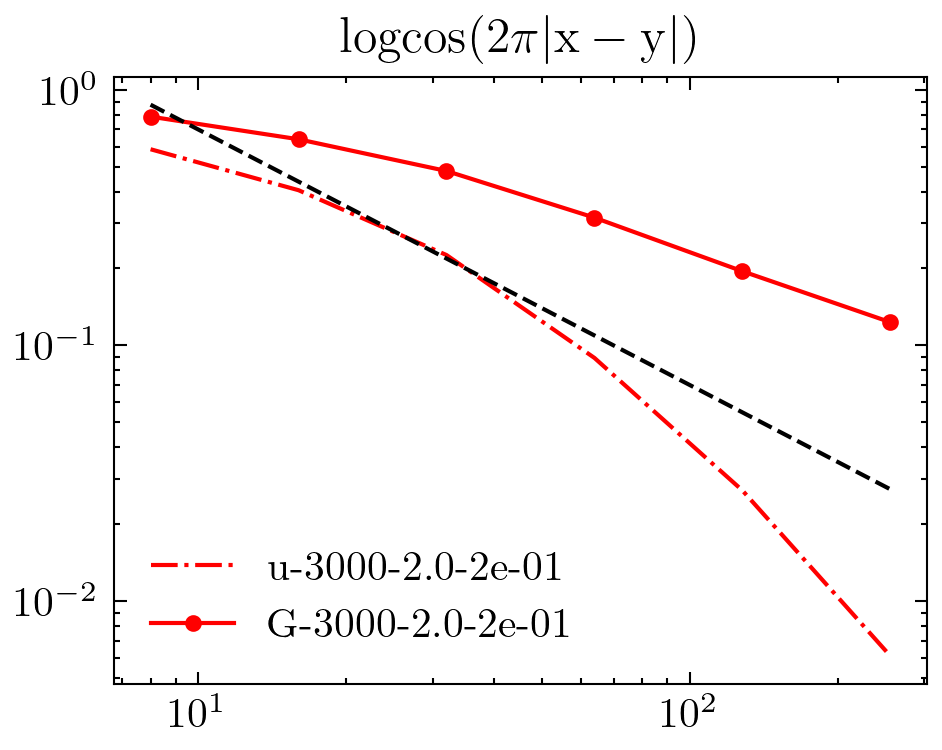

In [171]:
# url2 follows convergence rate
nTrain = 3000
sigma = '2e-01'
param = 2.0
task = 'logcos3D'

ns, url2, Grl2 = load_data(
    task=task, nTrain=nTrain, nTest=1000, sigma=sigma, param=param)

plt.plot(ns, url2, '-.r', label=f'u-{nTrain}-{param}-{sigma}')
plt.plot(ns, Grl2, '.-r', label=f'G-{nTrain}-{param}-{sigma}')
plt.plot(ns, 7*ns**-1., '--k')
plt.yscale('log')
plt.xscale('log')
plt.title('$\\text{logcos}(2\pi |\mathrm{x} - \mathrm{y}|)$')
plt.legend()


estimate log(r)*cos(kr) kernel, k=1.0
n : 8 rl2 : 6.0801e-01
n : 16 rl2 : 4.2217e-01
n : 32 rl2 : 2.6402e-01
n : 64 rl2 : 1.6091e-01
n : 128 rl2 : 9.8915e-02
n : 256 rl2 : 6.2388e-02


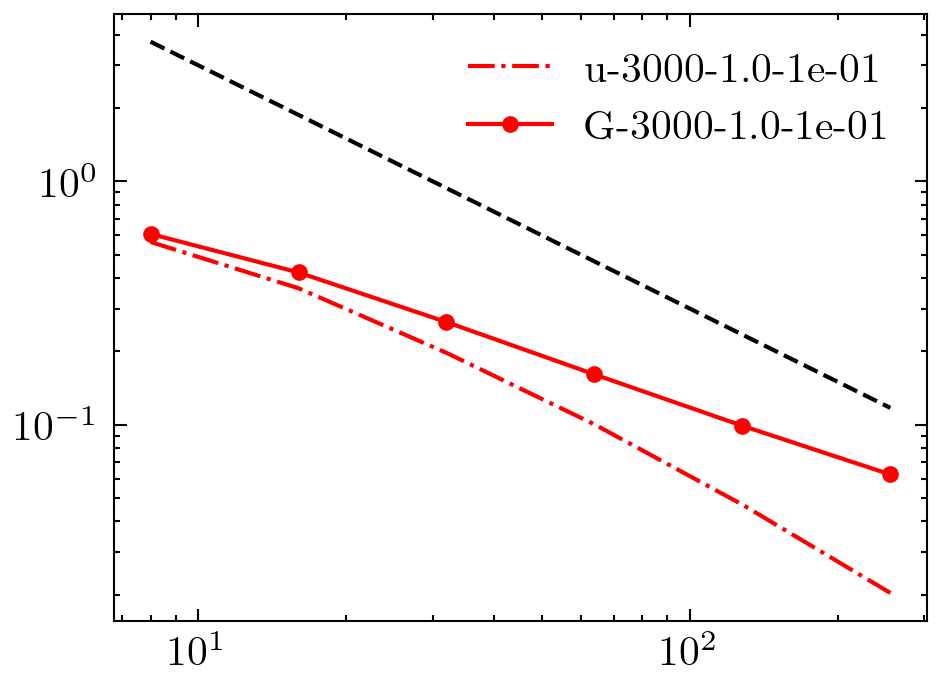

In [180]:
nTrain = 3000
sigma = '1e-01'
param = 1.0

ns, url2, Grl2 = load_data(
    nTrain=nTrain, nTest=1000, sigma=sigma, param=param)

plt.plot(ns, url2, '-.r', label=f'u-{nTrain}-{param}-{sigma}')
plt.plot(ns, Grl2, '.-r', label=f'G-{nTrain}-{param}-{sigma}')
plt.plot(ns, 30*ns**-1., '--k')
plt.yscale('log')
plt.xscale('log')
plt.legend()

estimate cos(r) kernel, k=4.0
n : 8 rl2 : 9.7661e-01
n : 16 rl2 : 9.1881e-01
n : 32 rl2 : 8.1877e-01
n : 64 rl2 : 6.6938e-01
n : 128 rl2 : 4.8252e-01
n : 256 rl2 : 3.0395e-01


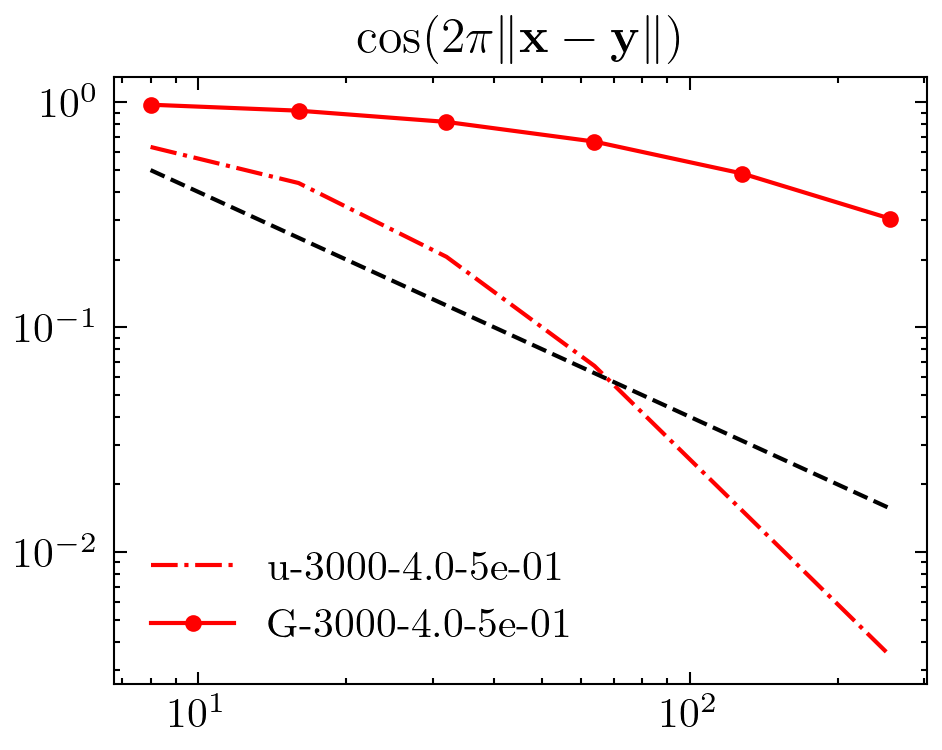

In [184]:
nTrain = 3000
sigma = '5e-01'
param = 4.0

ns, url2, Grl2 = load_data(
    task='cos3D', nTrain=nTrain, nTest=1000, sigma=sigma, param=param)

plt.plot(ns, url2, '-.r', label=f'u-{nTrain}-{param}-{sigma}')
plt.plot(ns, Grl2, '.-r', label=f'G-{nTrain}-{param}-{sigma}')
plt.plot(ns, 4*ns**-1., '--k')
plt.yscale('log')
plt.xscale('log')
plt.title("$\cos(2\pi\|\mathbf{x} - \mathbf{y}\|)$")
plt.legend()